Caso de ML que resolvemos con nuestro Toolbox (1 y 2)

In [19]:
import warnings
warnings.filterwarnings("ignore")

from Toolbox_ML import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [20]:
credit = pd.read_csv("./data/credit_npo.csv")

credit.dropna(inplace = True)

In [21]:
columnas_validas = get_features_num_classification(dataframe=credit, target_col="SeriousDlqin2yrs", pvalue=0.05)

# Seleccionar solo las columnas validas en el dataset credit
credit_numerico = credit[columnas_validas]

# Mostrar las columnas seleccionadas
print("Columnas seleccionadas que pasan la prueba de ANOVA:")
print(columnas_validas)

Columnas seleccionadas que pasan la prueba de ANOVA:
['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


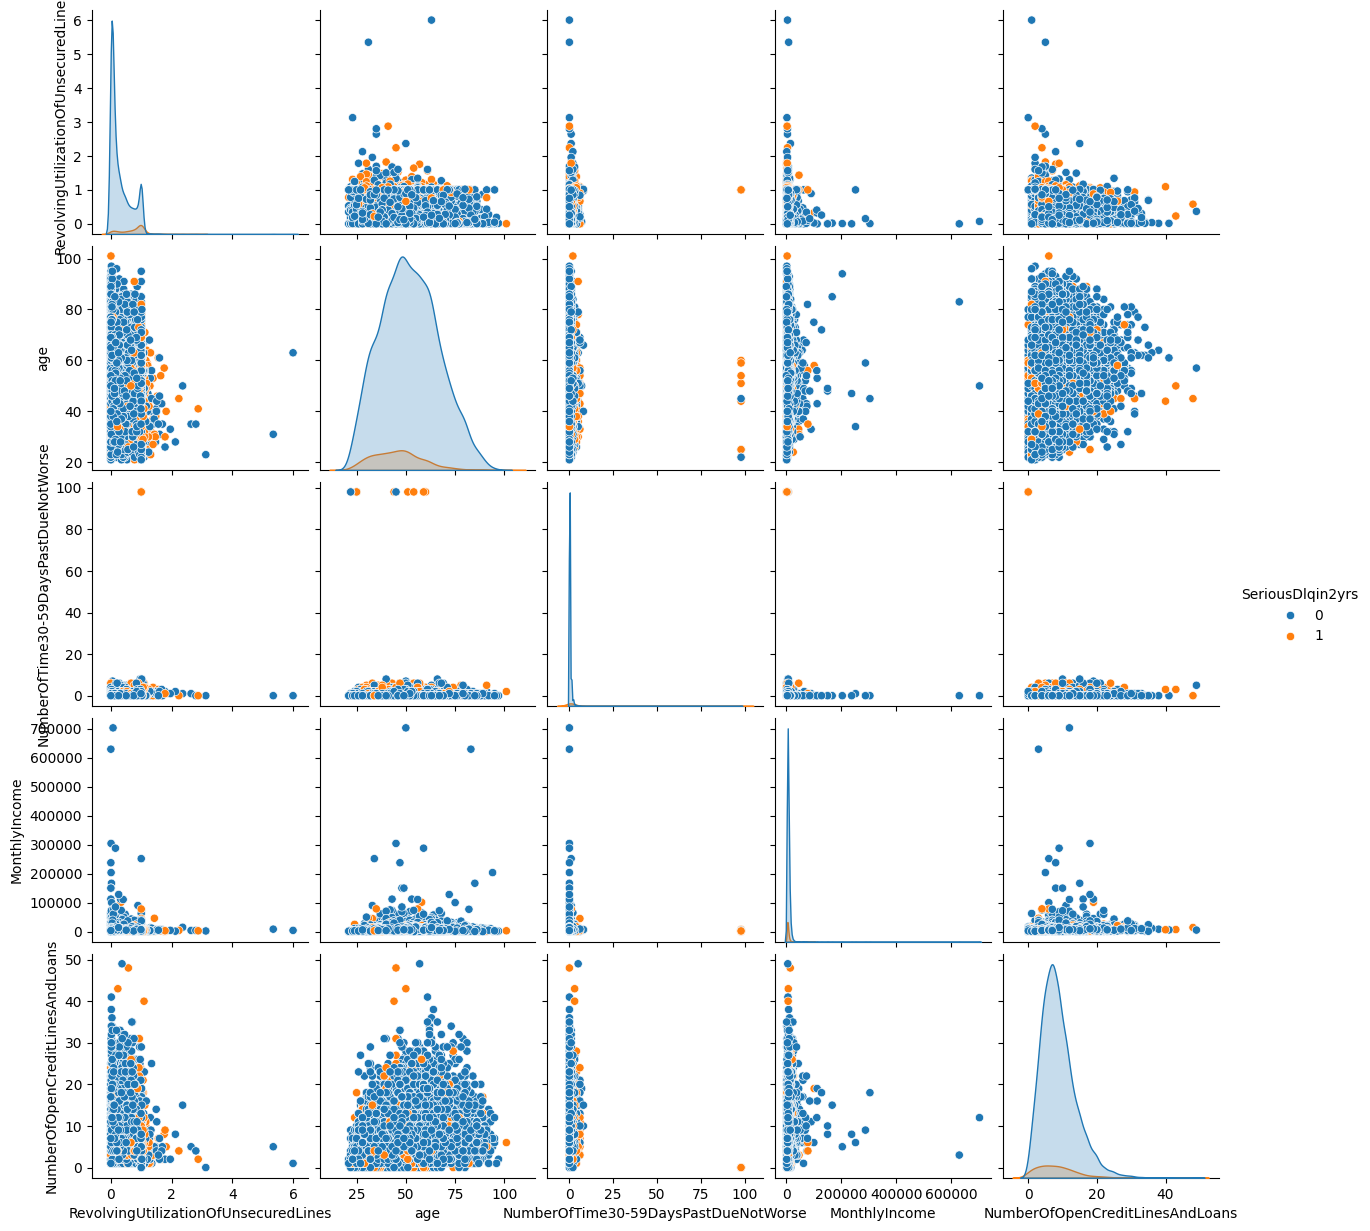

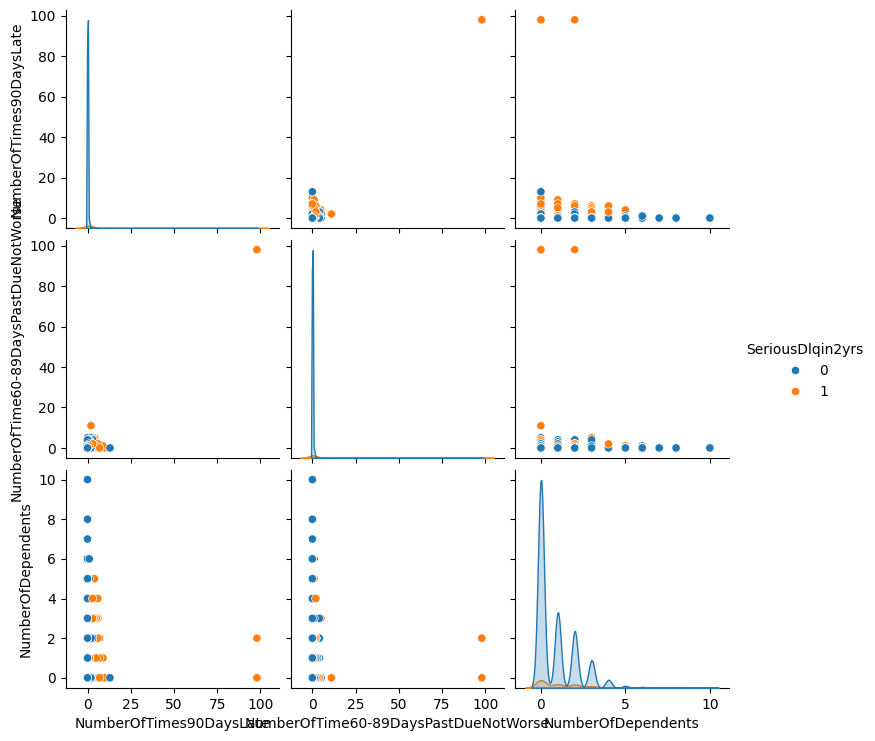

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [22]:
plot_features_num_classification(dataframe=credit, target_col="SeriousDlqin2yrs", pvalue=0.05)

In [23]:
# Llamar a la función super_selector
selectores = {
    "KBest": 10,  # Seleccionar las 10 mejores características según f_classif
    "FromModel": (LogisticRegression(max_iter=1000), 5),  # Seleccionar hasta 5 características según Logistic Regression
    "RFE": (LogisticRegression(max_iter=1000), 8, 1),  # Seleccionar 8 características usando Recursive Feature Elimination
    "SFS": (LogisticRegression(max_iter=1000), 6)  # Seleccionar 6 características usando Sequential Feature Selector
}
hard_voting = ["RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio"]

selected_features = super_selector(dataset=credit, target_col="SeriousDlqin2yrs", selectores=selectores, hard_voting=hard_voting)

# Imprimir los resultados
print("Features seleccionadas por cada método y por hard voting:")
for key, value in selected_features.items():
    print(f"{key}: {value}")

Features seleccionadas por cada método y por hard voting:
KBest: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
FromModel: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
RFE: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
SFS: ['age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
hard_voting: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTimes90DaysLate', '

In [24]:
# Dividir en conjunto de entrenamiento y prueba
X_selected = credit[selected_features["hard_voting"]]
y = credit["SeriousDlqin2yrs"]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Hacer predicciones
predicciones = modelo.predict(X_test)

In [25]:
# Seleccionar X e y
X_credit = credit.drop(columns = ["SeriousDlqin2yrs"])
y_credit = credit["SeriousDlqin2yrs"]

# Dividir en train y test
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size = 0.2, random_state = 42)

# Entrenar el modelo
predicciones_credit = LogisticRegression(max_iter = 1000).fit(X_train_credit, y_train_credit).predict(X_test_credit)

Accuracy: 0.9297800338409475
Precision: 0.7296824149927057
Recall: 0.5278918721501012
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2197
           1       0.53      0.06      0.11       167

    accuracy                           0.93      2364
   macro avg       0.73      0.53      0.54      2364
weighted avg       0.90      0.93      0.90      2364

Confusion Matrix (Absolute Values):
[[2188    9]
 [ 157   10]]


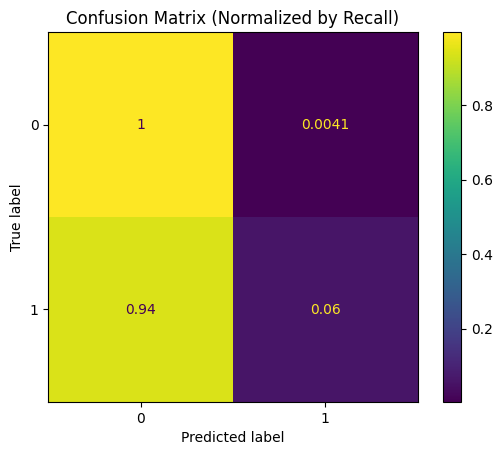

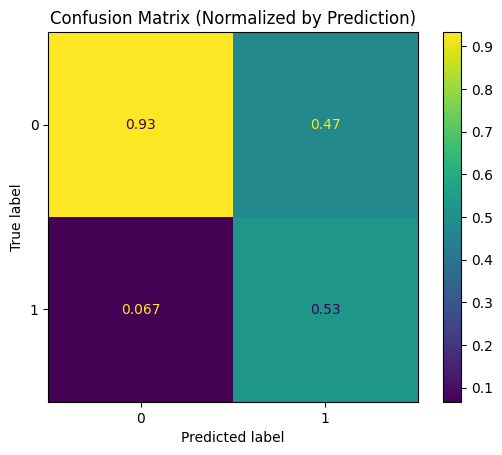

Precisión para la clase 1: 0.5263157894736842
Recall para la clase 1: 0.059880239520958084
ACCURACY: 0.9297800338409475
PRECISION: 0.7296824149927057
RECALL: 0.5278918721501012
CLASS_REPORT: 0.5263157894736842
MATRIX: 0.059880239520958084


In [26]:
# Evaluar el modelo
metricas = ["ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX", "MATRIX_RECALL", "MATRIX_PRED", "PRECISION_1", "RECALL_1"]
resultado_metricas = eval_model(y_test, predicciones, tipo_de_problema="clasificacion", metricas=metricas)

# Mostrar resultados
for metrica, resultado in zip(metricas, resultado_metricas):
    print(f"{metrica}: {resultado}")